# Dane COVID-19 z gov.pl, województwa

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga:
* Dane dla województw (i powiatów) są od 2020-11-23. Wcześniejsze nie są podawane publicznie.
* Obecnie ludność województw biorę z Eurostatu - to jest chyba na rok 2020.


## To do

* Daty na wykresach - wg języka
* Na https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2 jest teraz tabela z podaną liczbą ludności województw (powiatów). Jak to ściągnąć?
    * To jest do pobrania z https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/powierzchnia-i-ludnosc-w-przekroju-terytorialnym-w-2021-roku,7,18.html , ale tabele są skomplikowane, trzeba się temu przyjrzeć.
    * Albo tu: https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/ludnosc-stan-i-struktura-ludnosci-oraz-ruch-naturalny-w-przekroju-terytorialnym-stan-w-dniu-30-06-2021,6,30.html
        * Najciekawsza jest tu tabela06.xls i tabela03.xls Ludność w powiatach / województwach według płci i wieku
    * Nauczyć się api GUS https://api.stat.gov.pl/



In [1]:
import govpl_functions as govpl
import pandas as pd
import eurostat
import helper_functions as hf
import importlib
import glob
import os

In [2]:
pwd


'/home/ochab/koronawirus_PAN/gov.pl'

In [3]:
data_dir = './data'
img_dir = './images'

file = 'danehistorycznewojewodztwa.zip'

filepath = data_dir + '/' + file
formatted_data_path = data_dir + '/formatted/data.csv'
eurostat_pop_data_path = data_dir + '/formatted/eurostat_pop.csv'
url = 'https://arcgis.com/sharing/rest/content/items/a8c562ead9c54e13a135b02e0d875ffb/data'
nuts_names_file = 'nuts_ue_2021_en.xls'


In [21]:
importlib.reload(govpl)
importlib.reload(hf)
os.system('rm '+ formatted_data_path)


256

In [22]:
df, wojewodztwa = govpl.make_gov_voi_pop_df(
    url, file, data_dir, nuts_names_file, formatted_data_path, eurostat_pop_data_path)
display(df)
display(wojewodztwa)


Making formatted gov.pl data frame
Making Eurostat population data frame
Eurostat data file exists. Making data frame from file.
Today's gov.pl data file does not exist.
Merging gov.pl files to data frame
Formatting gov.pl data frame
Inserting voivodship population column into gov.pl data frame
Making formatted voivodship list


,wojewodztwo,liczba_przypadkow,liczba_na_10_tys_mieszkancow,zgony,zgony_w_wyniku_covid_bez_chorob_wspolistniejacych,zgony_w_wyniku_covid_i_chorob_wspolistniejacych,liczba_zlecen_poz,liczba_osob_objetych_kwarantanna,liczba_wykonanych_testow,liczba_testow_z_wynikiem_pozytywnym,liczba_testow_z_wynikiem_negatywnym,liczba_pozostalych_testow,teryt,stan_rekordu_na,liczba_ozdrowiencow,Data,Ludność
0,Polska,10141,2.64,540.0,55.0,485.0,40085.0,348135,47540,11502,34425,1613,t00,2020-11-23,NaN,2020-11-23,37958138.0
1,Dolnośląskie,1033,3.56,51.0,1.0,50.0,3060.0,27474,4161,1162,2864,135,t02,2020-11-23,NaN,2020-11-23,2864809.0
2,Kujawsko-Pomorskie,529,2.56,17.0,0.0,17.0,2982.0,20381,2691,603,2034,54,t04,2020-11-23,NaN,2020-11-23,2050976.0
3,Lubelskie,671,3.19,8.0,2.0,6.0,2216.0,19016,2280,757,1489,34,t06,2020-11-23,NaN,2020-11-23,2088292.0
4,Lubuskie,267,2.64,14.0,5.0,9.0,1199.0,10727,1084,305,743,36,t08,2020-11-23,NaN,2020-11-23,1001411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,Śląskie,859,1.91,20.0,10.0,10.0,3581.0,25753,6349,947,5353,49,t24,2021-11-08,415.0,2021-11-08,4475460.0
5963,Świętokrzyskie,264,2.15,6.0,1.0,5.0,897.0,6657,1921,295,1612,14,t26,2021-11-08,110.0,2021-11-08,1218743.0
5964,Warmińsko-Mazurskie,607,4.27,11.0,2.0,9.0,1915.0,15986,3063,646,2397,20,t28,2021-11-08,225.0,2021-11-08,1399038.0
5965,Wielkopolskie,783,2.24,9.0,1.0,8.0,3357.0,28797,4755,815,3895,45,t30,2021-11-08,394.0,2021-11-08,3479525.0


['Dolnośląskie',
 'Kujawsko-Pomorskie',
 'Lubelskie',
 'Lubuskie',
 'Łódzkie',
 'Małopolskie',
 'Opolskie',
 'Podkarpackie',
 'Podlaskie',
 'Pomorskie',
 'Śląskie',
 'Świętokrzyskie',
 'Warmińsko-Mazurskie',
 'Wielkopolskie',
 'Zachodniopomorskie']

In [23]:
df['Przypadki na 100 tys. mieszkańców'] = 1e5 * \
    df['liczba_przypadkow'] / df['Ludność']

cases_per_1e5 =\
    df.pivot_table(index="Data", columns="wojewodztwo",
                   values="Przypadki na 100 tys. mieszkańców")
# cases_per_1e5


In [24]:
df['Zgony na 100 tys. mieszkańców'] = 1e5*df['zgony'] / df['Ludność']

deaths_per_1e5 =\
    df.pivot_table(index="Data", columns="wojewodztwo",
                   values="Zgony na 100 tys. mieszkańców")
# deaths_per_1e5


In [25]:
cases =\
    df.pivot_table(index="Data", columns="wojewodztwo",
                   values="liczba_przypadkow")

# display(cases)
deaths =\
    df.pivot_table(index="Data", columns="wojewodztwo", values="zgony")
# display(deaths)


In [26]:
import numpy as np
from matplotlib import cm
import helper_functions as hf
import datetime as dt
import matplotlib as mpl
importlib.reload(govpl)
importlib.reload(hf)

color = cm.hsv(np.linspace(0, 1, 16))


color = cm.tab20(np.linspace(0, 1, 16))

mpl.rcParams['figure.dpi'] = 90
# Format vertical axis as 1000, 100, 1, 0.1, ..., etc. by striping unnecessary 0s
yfmt = hf.logformat()


In [38]:
importlib.reload(govpl)
importlib.reload(hf)

<module 'helper_functions' from '/home/ochab/koronawirus_PAN/gov.pl/helper_functions.py'>

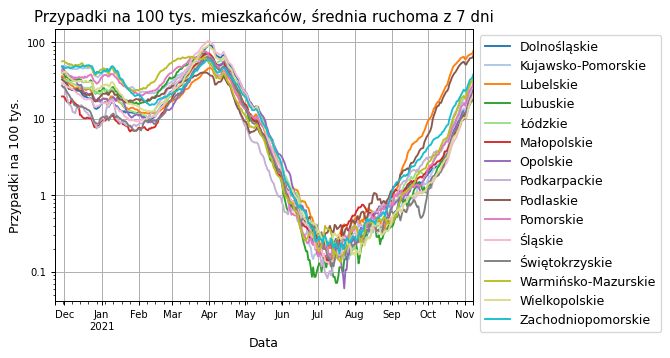

<Figure size 1800x1200 with 0 Axes>

In [40]:
plotdf = cases_per_1e5.rolling(7).mean()

xlim = None  # [dt.date(2021, 1, 1), dt.date(2021, 11, 1)]
ylim = None
logy = True

figname = 'cases_per_1e5.rolling(7).mean().svg'
figfmt = 'svg'

xlabel = "Data"
ylabel = 'Przypadki na 100 tys.'
title = "Przypadki na 100 tys. mieszkańców, średnia ruchoma z 7 dni"

fig = hf.plot(plotdf, wojewodztwa, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)

# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)


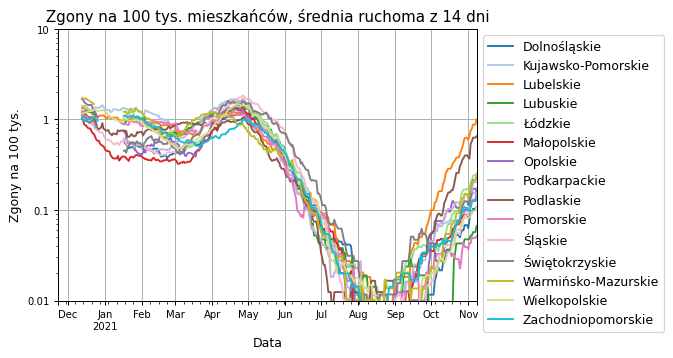

<Figure size 1800x1200 with 0 Axes>

In [41]:
plotdf = deaths_per_1e5.rolling(21).mean() # Od zachorowania do zgonu upływa średnio 3 tygodnie
xlim = None #[dt.date(2021, 1, 1), dt.date.today()]
ylim = [0.01, 10]
logy = True

figname = 'deaths_per_1e5.rolling(21).mean().svg'
figfmt = 'svg'

xlabel = "Data"
ylabel = 'Zgony na 100 tys.'
title = "Zgony na 100 tys. mieszkańców, średnia ruchoma z 14 dni"

fig = hf.plot(plotdf, wojewodztwa, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)
# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)


In [42]:
wojewodztwa1 = [
    #     'Dolnośląskie',
    #  'Kujawsko-Pomorskie',
    'Lubelskie',
    #  'Lubuskie',
    #  'Łódzkie',
    #  'Małopolskie',
    'Mazowieckie',
    #  'Opolskie',
    'Podkarpackie',
    'Podlaskie',
    #  'Pomorskie',
    #  'Śląskie',
    #  'Świętokrzyskie',
    #  'Warmińsko-Mazurskie',
    #  'Wielkopolskie',
    #  'Zachodniopomorskie'
]


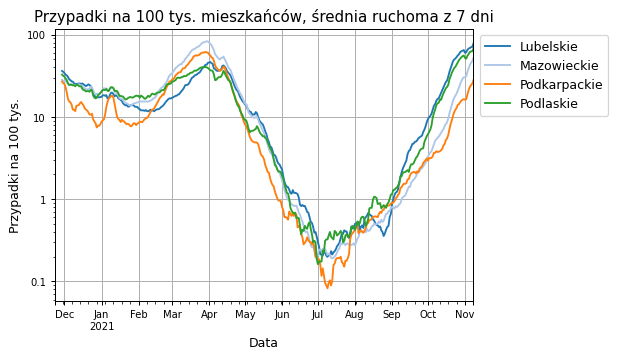

<Figure size 1800x1200 with 0 Axes>

In [43]:
plotdf = cases_per_1e5.rolling(7).mean()
xlim = None # [dt.date(2021, 1, 1), dt.date.today()]
ylim = None
logy = True

figname = 'cases_per_1e5.rolling(7).mean()_LMPP.svg'
figfmt = 'svg'

xlabel = "Data"
ylabel = 'Przypadki na 100 tys.'
title = "Przypadki na 100 tys. mieszkańców, średnia ruchoma z 7 dni"

fig = hf.plot(plotdf, wojewodztwa1, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)

# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)

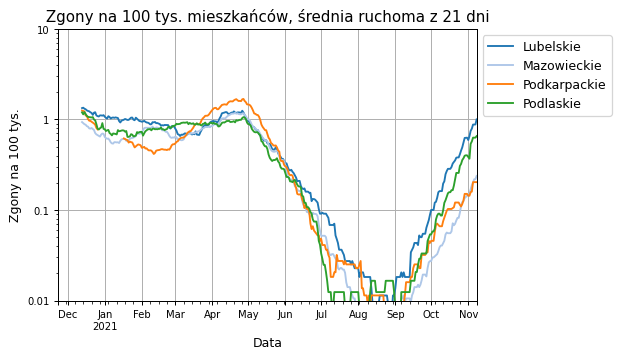

<Figure size 1800x1200 with 0 Axes>

In [50]:
plotdf = deaths_per_1e5.rolling(21).mean()
xlim = None # [dt.date(2021, 1, 1), dt.date.today()]
ylim = [0.01, 10]
logy = True

figname = 'deaths_per_1e5.rolling(21).mean()_LMPP.svg'
figfmt = 'svg'

xlabel = "Data"
ylabel = 'Zgony na 100 tys.'
title = "Zgony na 100 tys. mieszkańców, średnia ruchoma z 21 dni"

fig = hf.plot(plotdf, wojewodztwa1, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)
# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)

In [51]:
# pd.set_option('display.max_columns', None)
# display(df)
# pd.reset_option('display.max_columns')


In [52]:
tests =\
    df.pivot_table(index="Data", columns="wojewodztwo",
                   values="liczba_wykonanych_testow")
# display(tests)
positive_tests =\
    df.pivot_table(index="Data", columns="wojewodztwo",
                   values="liczba_testow_z_wynikiem_pozytywnym")
# display(positive_tests)

# positive_tests / tests


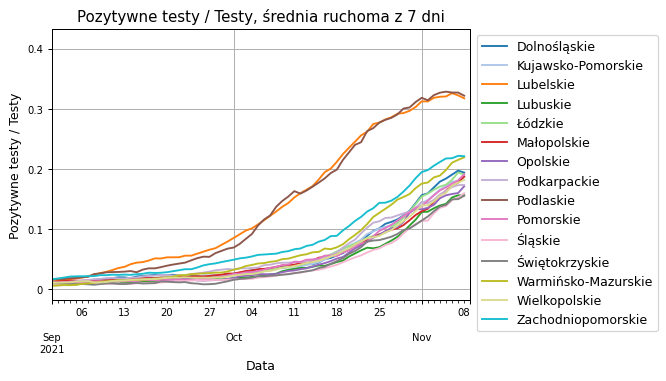

<Figure size 1800x1200 with 0 Axes>

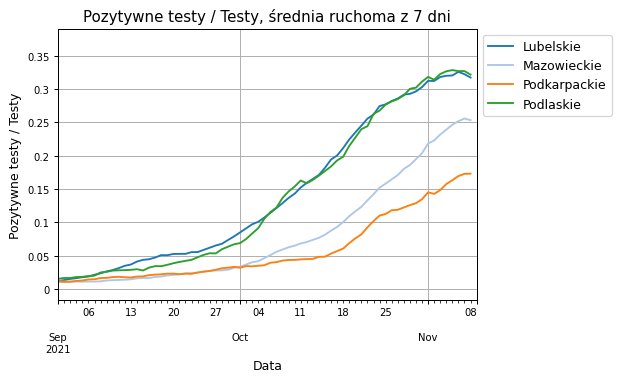

<Figure size 1800x1200 with 0 Axes>

In [53]:
plotdf = (positive_tests / tests).rolling(7).mean()
xlim = [dt.date(2021, 9, 1), dt.date.today()]
ylim = None
logy = False


figname = '(positive_tests to tests).rolling(7).mean().svg'
figfmt = 'svg'

xlabel = "Data"
ylabel = 'Pozytywne testy / Testy'
title = "Pozytywne testy / Testy, średnia ruchoma z 7 dni"

fig = hf.plot(plotdf, wojewodztwa, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)
# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)

figname = '(positive_tests to tests).rolling(7).mean()_LMPP.svg'
fig = hf.plot(plotdf, wojewodztwa1, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)
# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)

In [54]:
df['testy_na_1e5'] = df['liczba_wykonanych_testow']/df['Ludność']*1e5
tests1e5 =\
    df.pivot_table(index="Data", columns="wojewodztwo", values="testy_na_1e5")


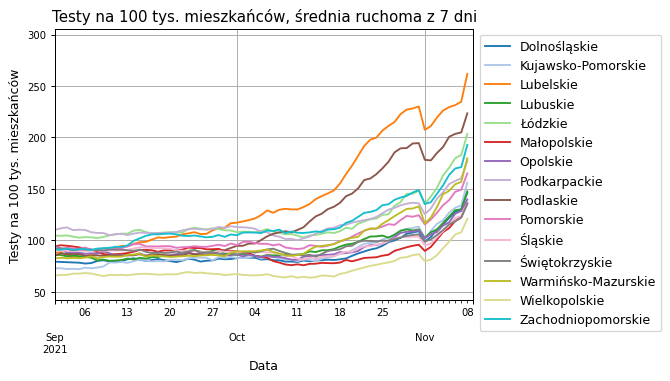

<Figure size 1800x1200 with 0 Axes>

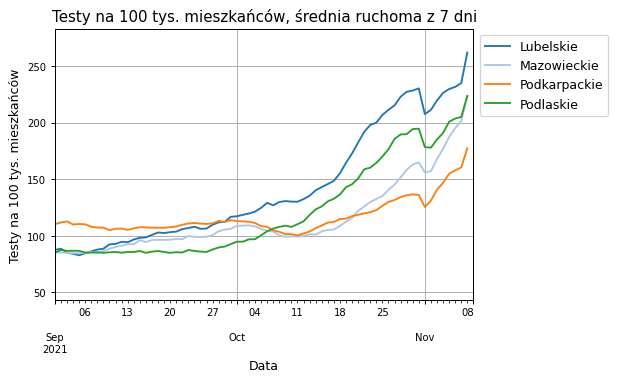

<Figure size 1800x1200 with 0 Axes>

In [56]:
plotdf = tests1e5.rolling(7).mean()
xlim = [dt.date(2021, 9, 1), dt.date.today()]
ylim = None
logy = False

figname = 'tests1e5.rolling(7).mean().svg'
figfmt = 'svg'

xlabel = "Data"
ylabel = 'Testy na 100 tys. mieszkańców'
title = "Testy na 100 tys. mieszkańców, średnia ruchoma z 7 dni"

fig = hf.plot(plotdf, wojewodztwa, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)
# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)

figname = 'tests1e5.rolling(7).mean()_LMPP.svg'
fig = hf.plot(plotdf, wojewodztwa1, xlim, ylim, logy,
              yfmt, color, xlabel, ylabel, title)
# fig.tight_layout() # Zwężenie wykresu
hf.save_fig(fig, img_dir, figname, figfmt)

In [20]:
# plotdf = cases.rolling(7).mean()
# xlim = None #[dt.date(2021, 6, 1), dt.date(2021, 11, 1)]
# ylim = None
# logy = True
# fig = hf.plot(plotdf, 'Polska', xlim, ylim, logy, yfmt)


### Poniżej próba ściągnięcia danych wcześniejszych
Wcześniejsze dane są tylko ogólnopolskie!

In [21]:
# url2 = "https://arcgis.com/sharing/rest/content/items/b03b454aed9b4154ba50df4ba9e1143b/data?"
# file2 = "Zakazenia30323112020.csv"


In [22]:
# import chardet
# def get_gov_df2(url, data_dir, file):
#     hf.getfile(url, data_dir+'/'+file)
#     raw_data = open(data_dir+'/'+file, 'rb').read()
#     encoding=chardet.detect(raw_data)['encoding']
#     if encoding == 'Windows-1252':
#         encoding = 'Windows-1250'
#     df = pd.read_csv(data_dir+'/'+file,encoding = encoding,sep=';')
#     return df


In [23]:
# get_gov_df2(url2, data_dir, file2)
